# Modelos de Ensamble

## Introducción

vamos a entrenar tres modelos base de clasificación, y construir a partir de ellos un ensamble para predecir el valor de la variable adaptivity_level.

Vamos a comparar la performance de los modelos base con la del modelo de ensamble.

## Dataset

En esta clase usaremos un dataset con info de la adapatabilidad   
Este dataset esta conformado por los siguientes features: 



0  **Gender:**  Gender type of student <br>
1  **Age:**  Age range of the student <br>
2  **Education Level:**     Education institution level <br>
3  **Institution Type:**    Education institution type <br>
4  **IT Student:**  Studying as IT student or not<br>
5  **Location:** Is student location in town<br>
6  **Load-shedding:** Level of load shedding<br>
7  **Financial Condition:**     Financial condition of family<br>
8  **Internet Type:**   Internet type used mostly in device<br>
9  **Network Type:**     Network connectivity type<br>
10 **Class Duration:**   Class Duration in hours<br>
11 **Self Lms:**     Institution’s own LMS availability<br>
12 **Device:**  Device used mostly in class<br>
13 **Adaptivity Level:**    Adaptivity level of the student  (Dependent Variable) 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
data_raw = pd.read_csv('data_raw.csv')
data_raw.shape

(1205, 15)

Text(0.5, 1.0, 'adaptivity_level')

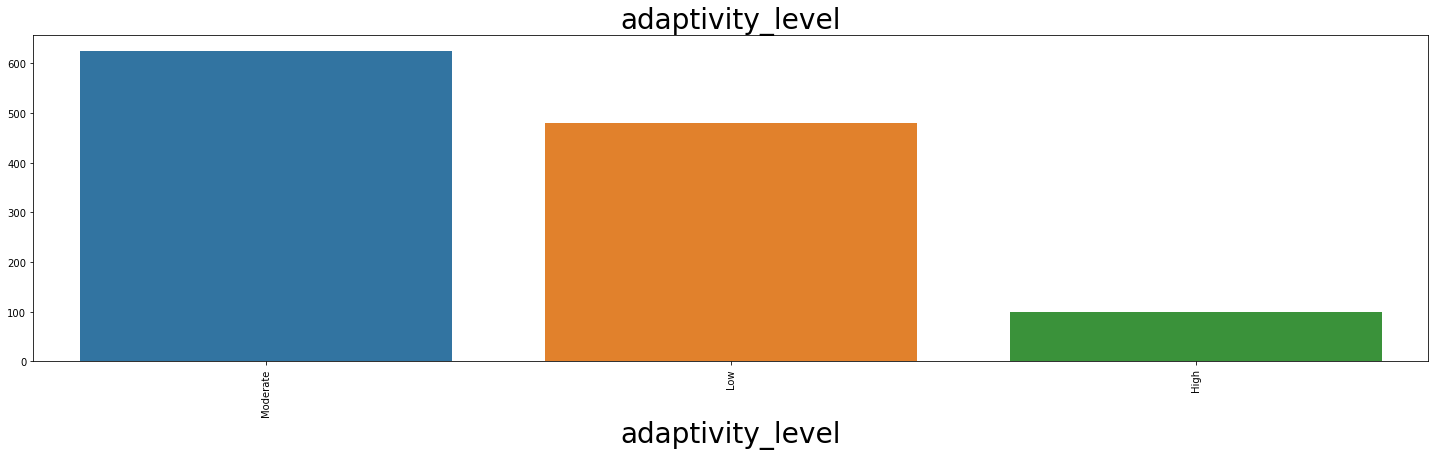

In [3]:
import seaborn as sns
plt.figure(figsize=(25,6))
sns.countplot(x='adaptivity_level',data=data_raw)
plt.xticks(rotation=90)
plt.xlabel("adaptivity_level", fontsize=28)
plt.ylabel("", fontsize=28)
plt.title("adaptivity_level", fontsize=28)

In [4]:
#Percentaje of items on the variable target
target =pd.DataFrame(data_raw['adaptivity_level'].value_counts())
target['percentaje']=round(target/ data_raw.shape[0]*100,2)
target[:]

,adaptivity_level,percentaje
Moderate,625,51.87
Low,480,39.83
High,100,8.30


Probability of find a students with Moderate is as follows: (We will need this information for the Null Hypothesis)

$$ Probability = \frac{625}{1205}  = 0.5186$$

In [12]:
data_raw.head(30)

,Unnamed: 0,gender,age,education_level,institution_type,IT_student,location,electricity_supply,financial_condition,internet_type,network_type,class_duration,learning_system,device,adaptivity_level
0,0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
5,5,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
6,6,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,0,No,Mobile,Low
7,7,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
8,8,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
9,9,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate


In [11]:
from sklearn.preprocessing import OrdinalEncoder
scaler = OrdinalEncoder()
columns=data_raw.columns
data = scaler.fit_transform(data_raw)
scaled_data = pd.DataFrame(data,columns=columns)
print(scaled_data.head(30))
print(scaled_data.shape)

    Unnamed: 0  gender  age  education_level  institution_type  IT_student  \
0          0.0     0.0  3.0              2.0               1.0         0.0   
1          1.0     1.0  3.0              2.0               1.0         0.0   
2          2.0     1.0  2.0              0.0               0.0         0.0   
3          3.0     1.0  1.0              1.0               1.0         0.0   
4          4.0     1.0  2.0              1.0               1.0         0.0   
5          5.0     0.0  1.0              1.0               1.0         0.0   
6          6.0     0.0  1.0              1.0               1.0         0.0   
7          7.0     0.0  1.0              1.0               1.0         0.0   
8          8.0     0.0  2.0              0.0               0.0         0.0   
9          9.0     0.0  1.0              1.0               1.0         0.0   
10        10.0     1.0  2.0              2.0               0.0         0.0   
11        11.0     1.0  2.0              0.0               1.0  

In [8]:
data.head(15)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [7]:
for column in data.columns:
   #data_raw[column].unique
 print (data[column].unique())

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [6]:
for column in data_raw.columns:
   #data_raw[column].unique
 print (data_raw[column].unique())


[   0    1    2 ... 1202 1203 1204]
['Boy' 'Girl']
['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
['University' 'College' 'School']
['Non Government' 'Government']
['No' 'Yes']
['Yes' 'No']
['Low' 'High']
['Mid' 'Poor' 'Rich']
['Wifi' 'Mobile Data']
['4G' '3G' '2G']
['3-6' '1-3' '0']
['No' 'Yes']
['Tab' 'Mobile' 'Computer']
['Moderate' 'Low' 'High']


## Imports

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from scipy.stats import mode
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [7]:
X=scaled_data.drop(['adaptivity_level'],axis=1)#Features 
y=scaled_data['adaptivity_level'] #target





Crear los conjuntos de train y test

In [8]:
#Partition the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(903, 14) (903,) (302, 14) (302,)


Se escala de acuerdo a https://scikit-learn.org/stable/modules/preprocessing.html

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train = max_abs_scaler.fit_transform(X_train)
X_test = max_abs_scaler.transform(X_test)

In [12]:
y_train.value_counts()

2.0    468
1.0    360
0.0     75
Name: adaptivity_level, dtype: int64

In [13]:
X_train

array([[0.3538206 , 0.        , 0.6       , ..., 1.        , 1.        ,
        0.5       ],
       [0.23504983, 0.        , 0.6       , ..., 0.5       , 1.        ,
        0.        ],
       [0.37624585, 1.        , 0.4       , ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.44684385, 0.        , 0.2       , ..., 0.        , 0.        ,
        0.5       ],
       [0.97093023, 1.        , 0.4       , ..., 1.        , 1.        ,
        0.5       ],
       [0.10963455, 0.        , 0.6       , ..., 1.        , 1.        ,
        0.5       ]])

In [14]:
#Define the model Multinomial
#softmax_model
model_1 = LogisticRegression(multi_class="multinomial",solver="lbfgs", random_state=50,max_iter=1600)
#Training model
fit_1 = model_1.fit(X_train,y_train)
#Forecast data
y_predict_1 = fit_1.predict(X_test)
accuracy_1 = accuracy_score(y_test,y_predict_1)
print (accuracy_1)
confusion_mat_1 = confusion_matrix(y_test, y_predict_1)

0.6854304635761589


In [15]:
confusion_mat_1

array([[  9,   6,  10],
       [  0,  70,  50],
       [  0,  29, 128]], dtype=int64)



Entrenar un modelo Regresion Logistica para predecir el valor de "adaptivity_level" y evaluar su perfomance en test mediante

* accuracy

* matriz de confusión
    


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
#log_model
model_2 = LogisticRegression(max_iter=200).fit(X_train,y_train)
fit_2 = model_2.fit(X_train,y_train)
y_predict_2 = fit_2.predict(X_test)
accuracy_2 = accuracy_score(y_test,y_predict_2)
confusion_mat_2 = confusion_matrix(y_test, y_predict_2)
print(accuracy_2)


0.6854304635761589




Entrenar un modelo KNN para predecir el valor de "adaptivity_level" y evaluar su perfomance en test mediante

* accuracy

* matriz de confusión


In [17]:
# Evaluamos nuevamente el accuracy del modelo con este K sugerido 
from sklearn.neighbors import KNeighborsClassifier as knn
model_3 = knn(n_neighbors=3)
# Ajustamos a los datos de entrenamiento.
fit_3 = model_3.fit(X_train, y_train)
y_predict_3 = fit_3.predict(X_test)
accuracy_3 = accuracy_score(y_test,y_predict_3)
# Predecimos etiquetas para los datos de test.
print (accuracy_3)

0.8377483443708609




Entrenar un modelo de Adabost para predecir el valor de "adaptivity_level" y evaluar su perfomance en test mediante

* accuracy

* matriz de confusión


In [18]:
from sklearn.ensemble import AdaBoostClassifier
model_4 = AdaBoostClassifier(n_estimators=50,learning_rate=1)
fit_4 = model_4.fit(X_train, y_train)
y_predict_4 = model_4.predict(X_test)
accuracy_4 = accuracy_score(y_test, y_predict_4)
print (accuracy_4)


0.6721854304635762


## Modelo de ensamble


Se construye un modelo de ensamble usando como modelos base los modelos anteriores.

Para esto, escribimos una función `predict_ensamble`, que calcule el valor de la etiqueta adaptivity_level como la moda de las respuestas de los predictores base

 Evaluaremos la performance del ensamble mediante 

* accuracy

* matriz de confusión




In [20]:
def predict_ensamble_1(X, model_1, model_2, model_3, model_4):
    y_predict_1 = model_1.predict(X)
    y_predict_2 = model_2.predict(X)
    y_predict_3 = model_3.predict(X)
    y_predict_4 = model_4.predict(X)
    result_mode = mode([y_predict_1, y_predict_2, y_predict_3,y_predict_4]).mode
    result = np.transpose(result_mode)    
    return result

In [21]:
predict_cat_ensemble_1 = predict_ensamble_1(X_test, fit_1, fit_2, fit_3, fit_4)
accuracy_ensemble_1 = accuracy_score(y_test, predict_cat_ensemble_1)
print(accuracy_ensemble_1)


0.7218543046357616


In [22]:
predict_cat_ensemble_1.shape
conf_mat_ensemble_1 = confusion_matrix(y_test, predict_cat_ensemble_1)
print(conf_mat_ensemble_1)

[[ 10   5  10]
 [  0  83  37]
 [  0  32 125]]


In [23]:
#Percentaje of items on the variable target
target =pd.DataFrame(data_raw['adaptivity_level'].value_counts())
target['percentaje']=round(target/ data_raw.shape[0]*100,2)
target[:]

,adaptivity_level,percentaje
Moderate,625,51.87
Low,480,39.83
High,100,8.30


Null Hypothesis: Probability of find a students with Moderate category is as follows: 

$$ Probability = \frac{625}{1205}  = 0.518$$

Null Hypothesis:

H0: The probability of find a student with Moderate category = 0,518

Alternative hypothesis.

H1: The probability of find a student with Moderate category > 0,518

In [25]:
H0=0.518672

In [26]:
### Resumen rendimiento de los modelos
modelo_performance_accuracy = pd.DataFrame({'Modelo': ['H0',
                                                      'Multinomial',
                                                      'LogisticRegression',  
                                                      'KNeighborsClassifier',
                                                      'AdaBoostClassifier',
                                                      'predict_ensamble_1'],
                                            'Accuracy': [H0,
                                                         accuracy_1,
                                                         accuracy_2,
                                                         accuracy_3,
                                                         accuracy_4,
                                                         accuracy_ensemble_1]})
modelo_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Modelo,Accuracy
3,KNeighborsClassifier,0.837748
5,predict_ensamble_1,0.721854
1,Multinomial,0.685430
2,LogisticRegression,0.685430
4,AdaBoostClassifier,0.672185
0,H0,0.518672


## Conclusión acerca de la técnica del ensamble

La performance del modelo de ensamble es superior respecto de la obtenida en los modelos base

## Ampliación de técnica del ensamble

Se evaluará la performance del modelo de ensamble ampliando la cantidad de los modelos base

In [27]:
#Naive Bayes
model_5 = GaussianNB()
fit_5 = model_5.fit(X_train, y_train)
y_predict_5 = model_5.predict(X_test)
accuracy_5 = accuracy_score(y_test, y_predict_5)
print (accuracy_5)


0.6920529801324503


In [28]:
from sklearn.tree import DecisionTreeRegressor
model_6 = DecisionTreeRegressor()
fit_6 = model_6.fit(X_train, y_train)
y_predict_6 = model_6.predict(X_test)
accuracy_6 = accuracy_score(y_test, y_predict_6)
print (accuracy_6)


0.7913907284768212


In [29]:
#Decision Tree

model_7 = tree.DecisionTreeClassifier()
fit_7 = model_7.fit(X_train, y_train)
y_predict_7 = model_7.predict(X_test)
accuracy_7 = accuracy_score(y_test, y_predict_7)
print (accuracy_7)

0.7582781456953642


In [31]:
from sklearn.model_selection import GridSearchCV
#GridSearch
params = {
    'max_depth': range(1,20,2),
    'min_samples_leaf': range(1,100,5),
    'min_samples_split': range(2,10),
    'criterion': ["gini", "entropy"],
    'splitter':['best', 'random'],
    'max_features': ['auto']
}
model_8 = GridSearchCV(estimator=model_7,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring="accuracy", error_score='raise')

fit_8 = model_8.fit(X_train,y_train.values.ravel())
y_predict_8 = model_8.predict(X_test)
accuracy_8 = accuracy_score(y_test, y_predict_8)
print (accuracy_8)

Fitting 4 folds for each of 6400 candidates, totalling 25600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 4240 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 12240 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 23440 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 25600 out of 25600 | elapsed:   56.7s finished


0.8675496688741722


In [37]:
def predict_ensamble_2(X, model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8):
    y_predict_1 = model_1.predict(X)
    y_predict_2 = model_2.predict(X)
    y_predict_3 = model_3.predict(X)
    y_predict_4 = model_4.predict(X)
    y_predict_5 = model_5.predict(X)
    y_predict_6 = model_6.predict(X)
    y_predict_7 = model_7.predict(X)
    y_predict_8 = model_8.predict(X)
    result_mode_2 = mode([y_predict_1, y_predict_2, y_predict_3,y_predict_4,y_predict_5,y_predict_6,y_predict_7,y_predict_8]).mode
    result = np.transpose(result_mode_2)    
    return result

In [38]:
predict_cat_ensemble_2 = predict_ensamble_2(X_test, fit_1, fit_2, fit_3, fit_4,fit_5,fit_6,fit_7,fit_8)
accuracy_ensemble_2 = accuracy_score(y_test, predict_cat_ensemble_2)
print(accuracy_ensemble_2)

0.7980132450331126


In [39]:
### Resumen rendimiento de los modelos
modelo_performance_accuracy = pd.DataFrame({'Modelo': ['H0',
                                                      'Multinomial',
                                                      'LogisticRegression',  
                                                      'KNeighborsClassifier',
                                                      'AdaBoostClassifier',
                                                      'Naive Bayes',
                                                      'DecisionTreeRegressor',  
                                                      'DecisionTreeClassifier',
                                                      'GridSearch',
                                                      'predict_ensamble_2',
                                                      'predict_ensamble_1',
                                                      ],
                                            'Accuracy': [H0,
                                                         accuracy_1,
                                                         accuracy_2,
                                                         accuracy_3,
                                                         accuracy_4,
                                                         accuracy_5,
                                                         accuracy_6,
                                                         accuracy_7,
                                                         accuracy_8,
                                                         accuracy_ensemble_1,
                                                         accuracy_ensemble_2]})
modelo_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Modelo,Accuracy
8,GridSearch,0.867550
3,KNeighborsClassifier,0.837748
10,predict_ensamble_1,0.798013
6,DecisionTreeRegressor,0.791391
7,DecisionTreeClassifier,0.758278
9,predict_ensamble_2,0.721854
5,Naive Bayes,0.692053
1,Multinomial,0.685430
2,LogisticRegression,0.685430
4,AdaBoostClassifier,0.672185


Se aprecia un descenso en el accuracy en el ensamble al agregar más modelos

Para los modelos donde el accuracy es mayor que 0.518 Entonces se rechaza la hipotesis nula, a favor de la hipotesis alternativa. 
El modelo es capaz de predecir moderado con un accuracy mayor que la regla de tres.